In [1]:
!pip install canaro
!pip install caer

In [2]:
import cv2 as cv
import requests
from io import BytesIO

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def url_img(url):
    try:
        response=requests.get(url)
        if response.status_code==200:
            image_data=BytesIO(response.content)
            im_array=np.asarray(bytearray(image_data.read()),dtype=np.uint8)
            image=cv.imdecode(im_array,cv.IMREAD_COLOR)
            return image
        else:
            print("Failed to retrieve image from URL. Status code:", response.status_code)
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None

In [5]:
path='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-XGsjytO3roYtVg4bmWBUjvJbFNrgM33G-A&usqp=CAU'

In [6]:
image=url_img(path)

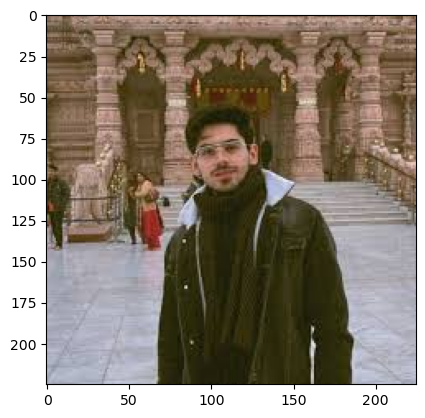

In [7]:
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))

In [8]:
hc=cv.CascadeClassifier('faces.xml')

In [9]:
hc

< cv2.CascadeClassifier 0000017F221449B0>

In [10]:
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

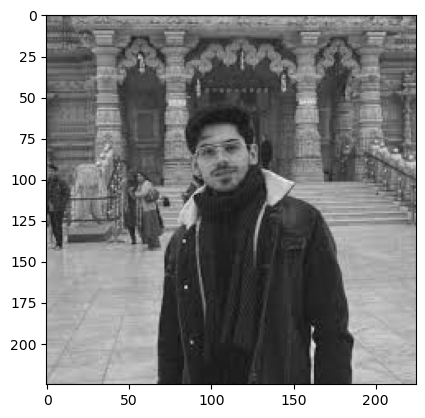

In [11]:
plt.imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))

In [12]:
face_rect=hc.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)

In [13]:
len(face_rect)

1

In [14]:
for (x,y,w,h) in face_rect:
    rectangle=cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)

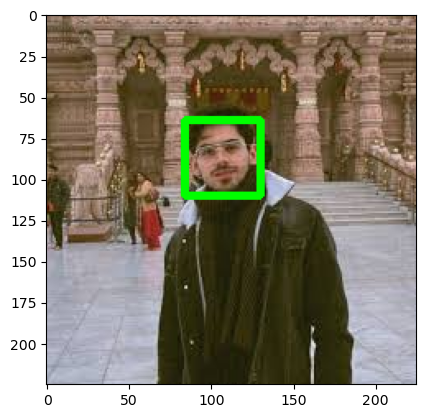

In [15]:
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))

In [16]:
img=url_img('https://media.licdn.com/dms/image/D5622AQErY0l-47MGUQ/feedshare-shrink_2048_1536/0/1710767341401?e=1714003200&v=beta&t=AUy2ux5T4WQGoID-TNXODAnuk8uE8UXtmmB85H40-Bg')

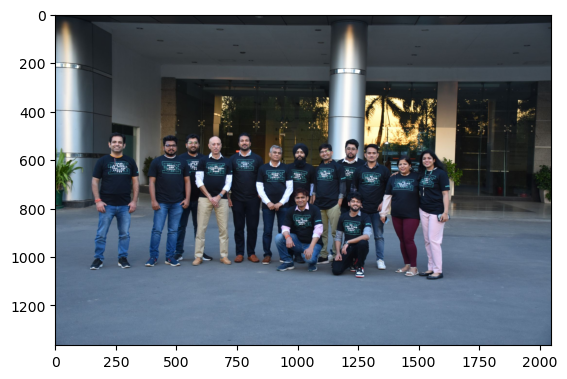

In [17]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [18]:
face_rect=hc.detectMultiScale(cv.cvtColor(img,cv.COLOR_BGR2GRAY),scaleFactor=1.3,minNeighbors=5)

In [19]:
len(face_rect)

15

In [20]:
for (x,y,w,h) in face_rect:
    rectangle=cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

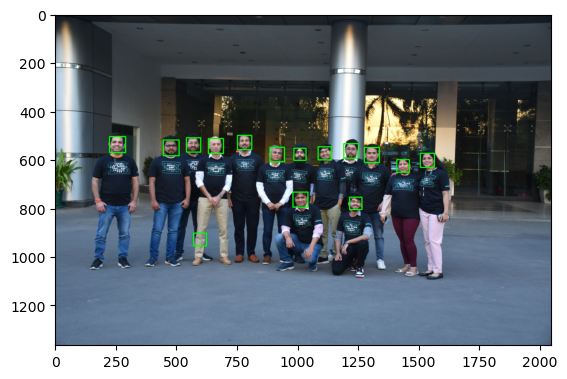

In [21]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))